In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/Churn_Modelling.csv
../input/sample_submission.csv
../input/test.csv
../input/train.csv


In [2]:
import sklearn
print(sklearn.__version__)
!python --version

1.3.0
/bin/bash: line 1: python: command not found


In [3]:
import pandas as pd
#import pandas_profiling 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()
print("done")

done


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
import warnings
warnings.filterwarnings('ignore')
print("done")

done


In [6]:
import os;
os.listdir('../input/')

['Churn_Modelling.csv', 'sample_submission.csv', 'test.csv', 'train.csv']

In [7]:
#choose color palette
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [8]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')
df_sub  = pd.read_csv('../input/sample_submission.csv')
df_orig = pd.read_csv('../input/Churn_Modelling.csv')
print("...done")

...done


In [9]:
#df_train.profile_report()

In [10]:
df_train.shape , df_orig.shape

((165034, 14), (10002, 14))

In [11]:
df_train.keys()

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df_test.keys()

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [13]:
df_orig.keys() #only 'id' is missing in df_orig

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
df_train.shape , df_orig.shape,df_test.shape

((165034, 14), (10002, 14), (110023, 13))

In [15]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [16]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [17]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [18]:
df_orig.rename(columns = {'RowNumber':'id'}, inplace = True) 

In [19]:
#combining df_train and df_orig
df_combined = pd.concat([df_train, df_orig], ignore_index=True)

In [20]:
#drop duplicates
df_combined.drop_duplicates()
df_combined.shape, df_train.shape,df_orig.shape

((175036, 14), (165034, 14), (10002, 14))

In [21]:
df_train['Exited'].unique(), df_orig['Exited'].unique()

(array([0, 1]), array([1, 0]))

In [22]:
df_train['Gender'].unique(), df_orig['Gender'].unique(),df_test['Gender'].unique()

(array(['Male', 'Female'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Female', 'Male'], dtype=object))

In [23]:
df_train['Geography'].unique(), df_orig['Geography'].unique(),df_test['Geography'].unique()

(array(['France', 'Spain', 'Germany'], dtype=object),
 array(['France', 'Spain', nan, 'Germany'], dtype=object),
 array(['France', 'Germany', 'Spain'], dtype=object))

In [24]:
len(df_combined['Surname'].unique()),len(df_train['Surname'].unique()) , len(df_orig['Surname'].unique()), len(df_test['Surname'].unique())

(2932, 2797, 2932, 2708)

In [25]:
l_test=list(df_test)
l_combined=list(df_combined)
le = LabelEncoder()
l1=df_combined['Surname'].unique()
l2=df_test['Surname'].unique()
l3=np.hstack([l1,l2])
l_Surname=list(np.unique(l3))

l_Surname=le.fit_transform(l_Surname)
df_combined['Surname']=le.transform(df_combined['Surname'])
df_combined=pd.DataFrame(df_combined,columns=l_combined)
df_test['Surname']=le.transform(df_test['Surname'])
df_test=pd.DataFrame(df_test,columns=l_test)

le = LabelEncoder()
df_combined['Gender']=le.fit_transform(df_combined['Gender'])
df_test['Gender']=le.transform(df_test['Gender'])
df_test=pd.DataFrame(df_test,columns=l_test)

le = LabelEncoder()
df_combined['Geography']=le.fit_transform(df_combined['Geography'])
df_test['Geography']=le.transform(df_test['Geography'])
df_test=pd.DataFrame(df_test,columns=l_test)

In [26]:
df_combined['Exited'].value_counts()

Exited
0    138077
1     36959
Name: count, dtype: int64

In [27]:
df_combined.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [28]:
df_combined=df_combined.dropna()

In [29]:
df_combined

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,2023,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,2024,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,1236,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,1362,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,491,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175031,9998,15584532,1570,709,0,0,36.0,7,0.00,1,0.0,1.0,42085.58,1
175032,9999,15682355,2345,772,1,1,42.0,3,75075.31,2,1.0,0.0,92888.52,1
175033,9999,15682355,2345,772,1,1,42.0,3,75075.31,2,1.0,0.0,92888.52,1
175034,10000,15628319,2751,792,0,0,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [30]:
df_test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,1607,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,1966,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,1351,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,1986,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,1172,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,2089,570,2,1,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,628,575,0,0,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,441,712,0,1,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,2877,709,0,0,32.0,3,0.00,1,1.0,1.0,158816.58


In [31]:
#max(df_combined['CreditScore']), max(df_test['CreditScore'])

In [32]:
def add_new_features(df):
    df['AgeGroup'] = df['Age'] // 10 * 10
    df['IsSenior'] = df['Age'].apply(lambda x: 1 if x >= 65 else 0)
    df['Balance_to_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary']
    df['CreditScoreTier'] = pd.cut(df['CreditScore'], bins=[0, 650, 750, 850], labels=['0', '1', '2'])
    df['IsActive_by_CreditCard'] = df['HasCrCard'] * df['IsActiveMember']
    df['Customer_Status'] = df['Tenure'].apply(lambda x:0 if x < 2 else 1)
    return df

In [33]:
df_combined=add_new_features(df_combined)
df_test=add_new_features(df_test)

In [34]:
y_train=df_combined['Exited']
X_train=df_combined.drop(['Exited','id'],axis=1)
X_test=df_test.drop(['id'],axis=1)

In [35]:
X_train.keys()

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'AgeGroup', 'IsSenior', 'Balance_to_Salary_Ratio',
       'CreditScoreTier', 'IsActive_by_CreditCard', 'Customer_Status'],
      dtype='object')

In [36]:
X_test.keys()

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'AgeGroup', 'IsSenior', 'Balance_to_Salary_Ratio',
       'CreditScoreTier', 'IsActive_by_CreditCard', 'Customer_Status'],
      dtype='object')

In [37]:
X_train.shape, X_test.shape

((175033, 18), (110023, 18))

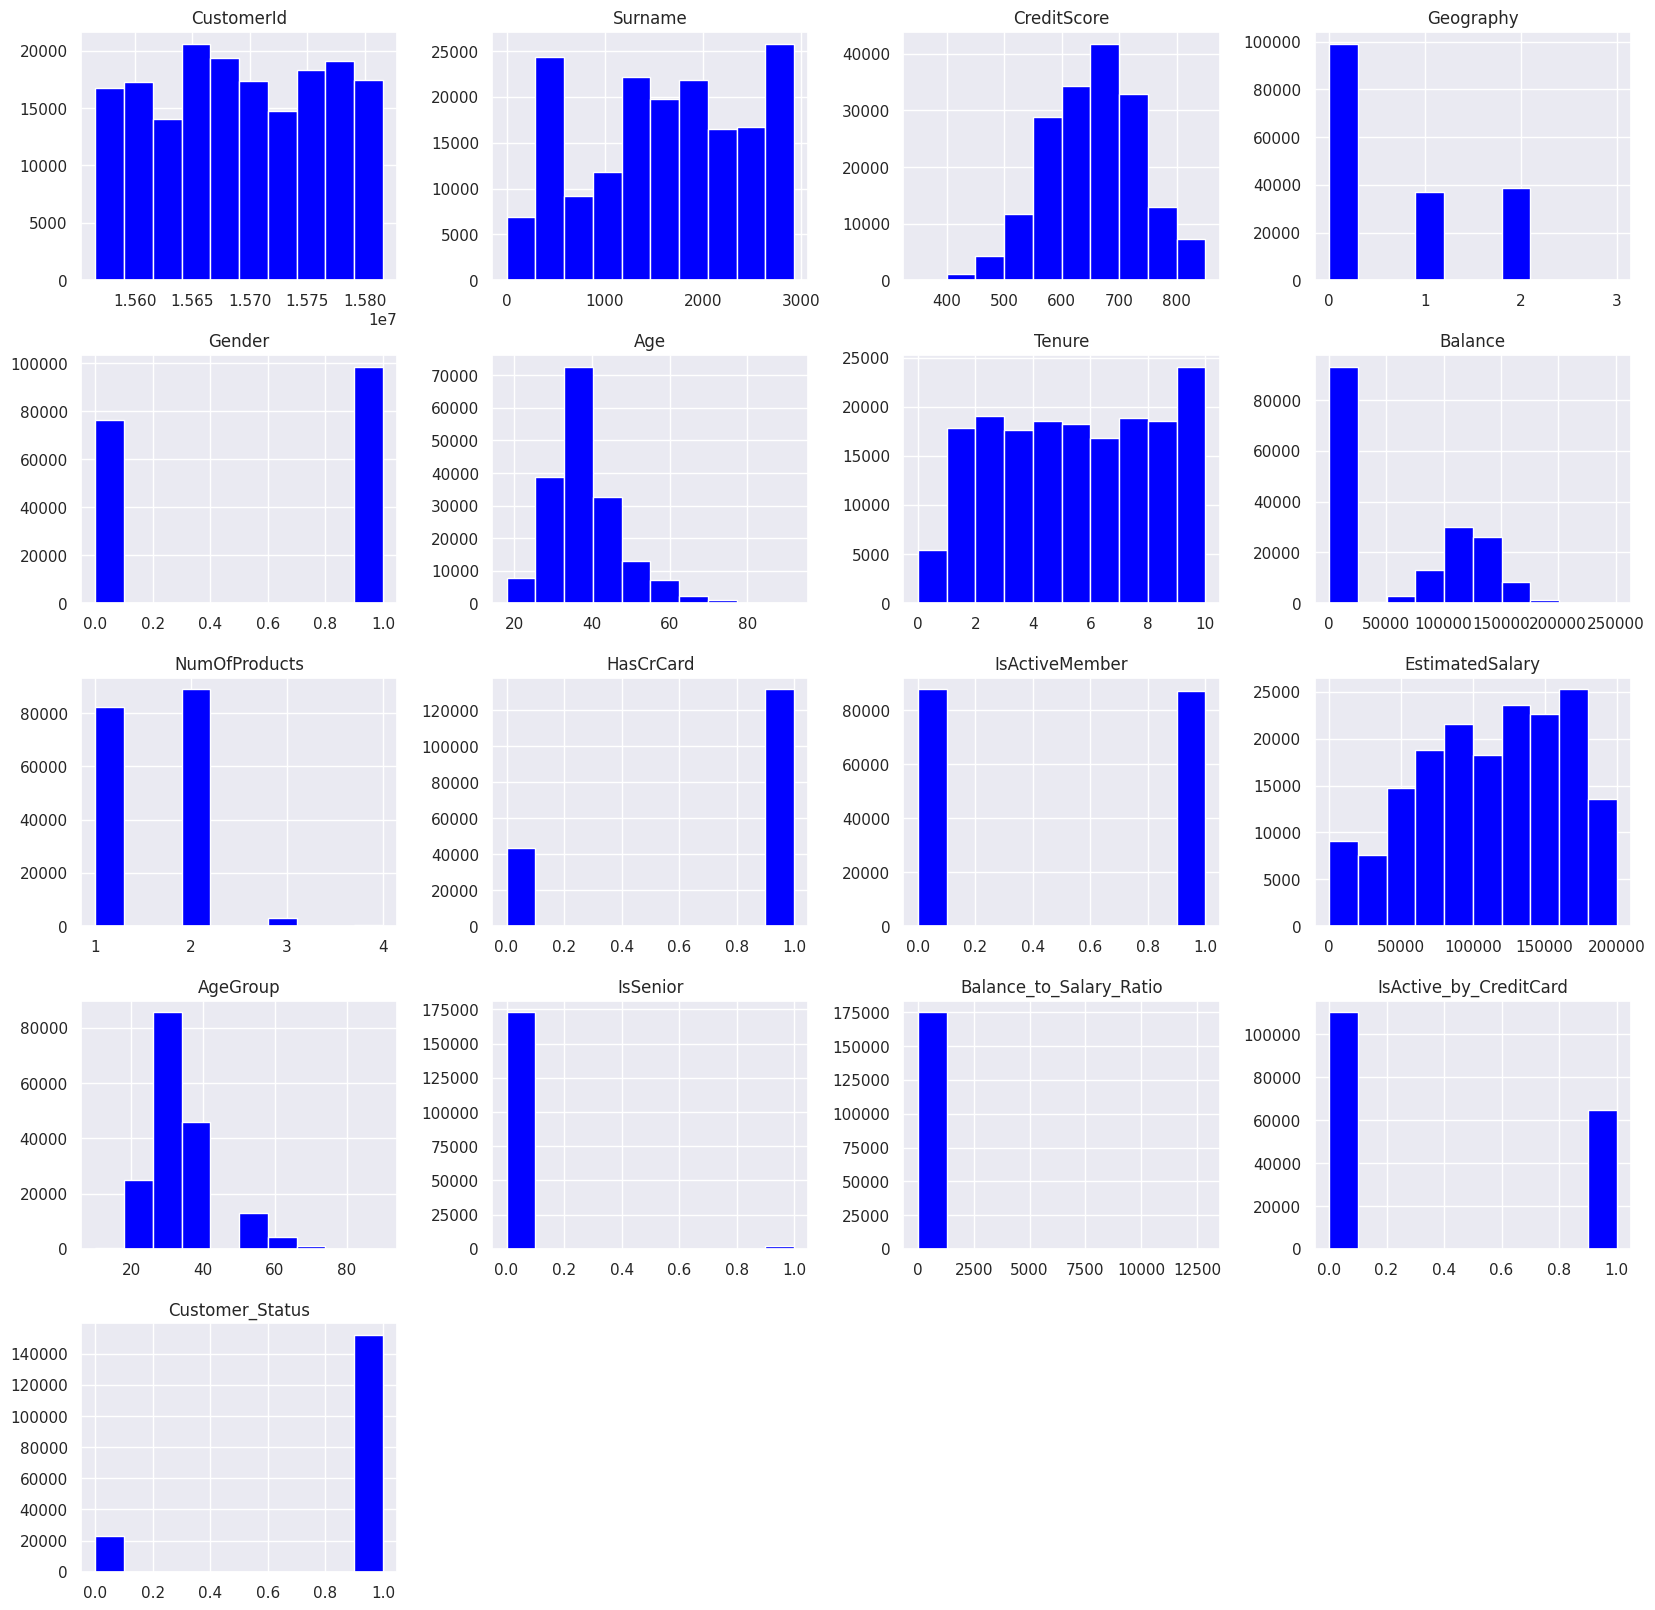

In [38]:
X_train.hist(figsize=(20,20),color = 'blue')
plt.show()

In [39]:
features=list(X_train)

In [40]:
# show correlation to target
for f in features:
    print(f,":",X_train[f].corr(y_train))

CustomerId : -0.009717656060735323
Surname : -0.02700503482871959
CreditScore : -0.02723470190321217
Geography : 0.05219880264483844
Gender : -0.14411789200235817
Age : 0.3366026281717808
Tenure : -0.01925227017021265
Balance : 0.12838878791130443
NumOfProducts : -0.20449580851481175
HasCrCard : -0.02111888816106734
IsActiveMember : -0.2072118566692743
EstimatedSalary : 0.018603941855032193
AgeGroup : 0.3221899398541786
IsSenior : -0.002574525172480242
Balance_to_Salary_Ratio : 0.003118271517108101
CreditScoreTier : -0.028340414182083606
IsActive_by_CreditCard : -0.17564549481514016
Customer_Status : -0.0202666866789978


In [41]:
# plausible candidate_features_to_be_dropped in analysis phase based on guess 
candiate_features_1=['Surname','CreditScore','Geography','Tenure','HasCrCard','EstimatedSalary']
candiate_features_2=['Surname','Tenure','HasCrCard','EstimatedSalary']
candiate_features_3=['Geography','Tenure']
candiate_features_4=[]

In [42]:
X_train.shape, X_test.shape

((175033, 18), (110023, 18))

In [43]:
y_train=y_train.to_numpy()

****************-----------------------------------**Models---**--------------------------------------************

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [45]:
!pip install xgboost
# check xgboost version
import xgboost
print(xgboost.__version__)


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
2.0.0


In [46]:
import xgboost as xgb

In [47]:
n_run=0
test_preds = [] #for storing test_preds calculated by each model
errors_list = [] #for storing errors calculated by each model
scores_list = [] #for storing roc auc scores calculated by each model
score_threshold=0.0
CV_Value=10
n_splits=10 #20 #15
SEED   = 97

**Random Forest Classifier**

In [48]:
rfc=RandomForestClassifier(n_estimators=250,max_features=None,max_depth=13,criterion='gini',random_state=83)

In [49]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=13, max_features=None, n_estimators=250,
                       random_state=83)

<b> Extra Trees Classifier </b>

In [50]:
ERF=ExtraTreesClassifier(n_estimators=500,max_depth=13,criterion='gini',random_state=45)

In [51]:
#ERF.fit(X_train,y_train)

<b> XGBOOST </b>

In [52]:
xgb_params = {'n_estimators'          : 2048,
          'max_depth'             : 10,
          'learning_rate'         : 0.05,
          'booster'               : 'gbtree',
          'subsample'             : 0.75,
          'colsample_bytree'      : 0.30,
          'reg_lambda'            : 1.00,
          'reg_alpha'             : 1.00,
          'gamma'                 : 1.00,
          'random_state'          : 578,
          'objective'             : 'binary:logistic',
          'tree_method'           : 'gpu_hist',
          'eval_metric'           : 'auc',
          'early_stopping_rounds' : 256,
          'n_jobs'                : -1,
         }

xgb_params_1 = {
        'n_estimators':1200,
        'objective':'binary:logistic',
        'max_depth':15,
        'eta':0.01,
        'random_state':45,
        'subsample':0.6,
        'colsample_bytree':0.7
}

In [53]:
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED) 

#Cross-validation
for params in [xgb_params,xgb_params_1]:
    #for cf in [candiate_features_1,candiate_features_2,candiate_features_3,candiate_features_4]:
    for cf in [candiate_features_4]:    
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
            print(f'Fold {fold + 1}*******************************************************')
            X_train_new=X_train.drop(cf,axis=1)
            train_data = xgb.DMatrix(X_train_new.iloc[train_idx], label=y_train[train_idx],enable_categorical='True')
            val_data = xgb.DMatrix(X_train_new.iloc[val_idx], label=y_train[val_idx],enable_categorical='True')
            n_round =500
            watchlist = [(val_data, 'validation')]
            bst = xgb.train(params, train_data, n_round, evals=watchlist, verbose_eval=100)
            val_fold_preds = bst.predict(val_data)
            score = roc_auc_score(y_train[val_idx], val_fold_preds)
            print(f'score: {score}')
            if score > score_threshold :
                scores_list.append(score)
                X_test_new=X_test.drop(cf,axis=1)
                test_DMatrix = xgb.DMatrix(X_test_new,enable_categorical='True')
                test_fold_preds = bst.predict(test_DMatrix)
                test_preds.append(test_fold_preds)
                n_run = n_run +1

run_avg = sum(scores_list) / n_run
print("n_run",n_run)
print(f'Average score  over all folds: {run_avg}')

# Average the test predictions over folds
avg_xgb_test_preds = sum(test_preds) / n_run


Fold 1*******************************************************
[0]	validation-auc:0.77758
[100]	validation-auc:0.88567
[200]	validation-auc:0.88810
[300]	validation-auc:0.88897
[400]	validation-auc:0.88894
[499]	validation-auc:0.88920
score: 0.8892031346405622
Fold 2*******************************************************
[0]	validation-auc:0.78661
[100]	validation-auc:0.88744
[200]	validation-auc:0.88957
[300]	validation-auc:0.89099
[400]	validation-auc:0.89134
[499]	validation-auc:0.89160
score: 0.8915990886768697
Fold 3*******************************************************
[0]	validation-auc:0.78946
[100]	validation-auc:0.89001
[200]	validation-auc:0.89257
[300]	validation-auc:0.89331
[400]	validation-auc:0.89331
[499]	validation-auc:0.89311
score: 0.8931109718062934
Fold 4*******************************************************
[0]	validation-auc:0.78444
[100]	validation-auc:0.88998
[200]	validation-auc:0.89263
[300]	validation-auc:0.89348
[400]	validation-auc:0.89360
[499]	validatio

In [54]:
#rfc.fit(X_train,y_train)
#ERF.fit(X_train,y_train)
#xgb_clf.fit(X_train,y_train)

<b> Prediction </b>

In [55]:
#y_hat_test_rf=rfc.predict_proba(X_test)[:,1]
#y_hat_test_xg=xgb_clf.predict_proba(X_test)[:,1]
#y_hat_test_erf=ERF.predict_proba(X_test)[:,1]

In [56]:
#y_hat_test=0.8 * avg_xgb_test_preds + 0.2 * y_hat_test_rf
y_hat_test= avg_xgb_test_preds 

# **Submission** 

In [57]:
my_submission = pd.DataFrame({'id': df_test.id, 'Exited': y_hat_test})
print(my_submission)
my_submission.to_csv('../output/submission.csv', index=False)

            id    Exited
0       165034  0.032188
1       165035  0.866029
2       165036  0.017580
3       165037  0.214982
4       165038  0.286346
...        ...       ...
110018  275052  0.033654
110019  275053  0.174831
110020  275054  0.018854
110021  275055  0.189496
110022  275056  0.193328

[110023 rows x 2 columns]


<b>Please upvote if you find this notebook useful.</b>

<b> Thank You! </b>